In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
print(G.is_directed())

False


In [3]:
print(G.graph)

{}


In [4]:
H = nx.DiGraph()
print(H.is_directed())

True


In [5]:
G.graph["Name"] = "Bar"
print(G.graph)

{'Name': 'Bar'}


<class 'networkx.classes.graph.Graph'>


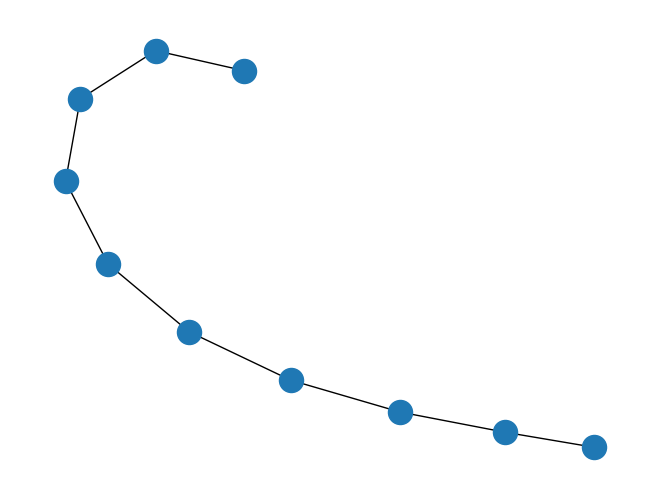

In [6]:
H = nx.path_graph(10)
print(type(H))
nx.draw(H)

In [7]:
# Add one node with node level attributes
G.add_node(0, feature=0, label=0)
# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [8]:
G.add_nodes_from([
    (1, {"feature": 1, "label": 1}),
    (2, {"feature": 2, "label": 2})
])

for node in G.nodes(data=True):
    print(node)

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})


In [9]:
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

G has 3 nodes


In [10]:
G.add_edge(0, 1, weight=0.5)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [11]:
G.add_edges_from([
  (1, 2, {"weight": 0.3, "test": "Ray"}),
  (2, 0, {"weight": 0.1})
])

In [12]:
for edge in G.edges():
  print(edge)

(0, 1)
(0, 2)
(1, 2)


In [13]:
G.edges[(1, 2)]

{'weight': 0.3, 'test': 'Ray'}

In [14]:
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

G has 3 edges


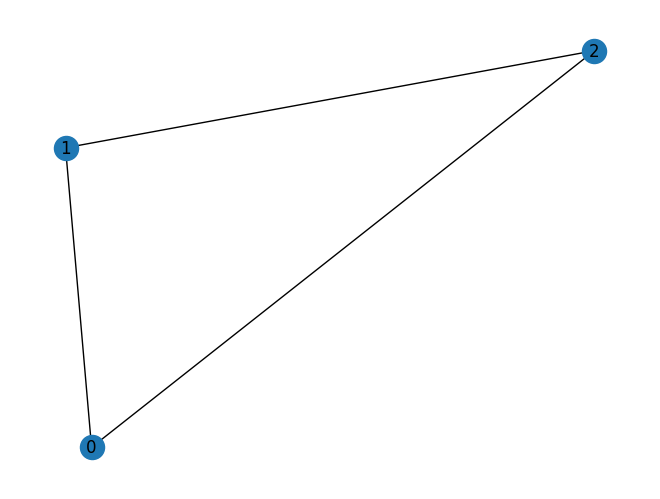

In [15]:
nx.draw(G, with_labels = True)

In [16]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


{0: 0.06673223863725547,
 1: 0.11682910626189469,
 2: 0.1086110888948075,
 3: 0.1046963327913161,
 4: 0.10313123341472627,
 5: 0.10313123341472627,
 6: 0.1046963327913161,
 7: 0.1086110888948075,
 8: 0.11682910626189469,
 9: 0.06673223863725547}

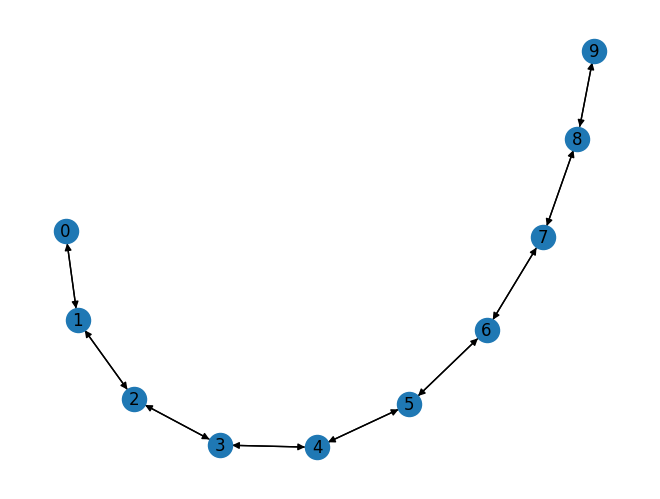

In [17]:
num_nodes = 10
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

In [18]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.1.0+cu118


In [19]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):  #is_tensor(obj): Returns True if obj is a PyTorch tensor.
        h = h.detach().cpu().numpy()
        #https://pytorch.org/docs/stable/autograd.html?highlight=detach#torch.Tensor.detach
        #pytorch .detach() .detach_() 和 .data用于切断反向传播https://blog.csdn.net/weixin_33913332/article/details/93300411
        
        #https://pytorch.org/docs/stable/tensors.html?highlight=cpu#torch.Tensor.cpu
        #cpu():Returns a copy of this object in CPU memory.
        
        #https://pytorch.org/docs/stable/tensors.html?highlight=numpy#torch.Tensor.numpy
        #Returns self tensor as a NumPy ndarray.
        
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [20]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [21]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {int(data.num_edges/2)}')  #原代码没有/2，但是我觉得不应当
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')  #PRW:2E/N
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 78
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


/home/ray/code/test/PDE/PeRCNN/percnn/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/home/ray/code/test/PDE/PeRCNN/percnn/lib/python3.8/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [22]:
#PRW
print(data.edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

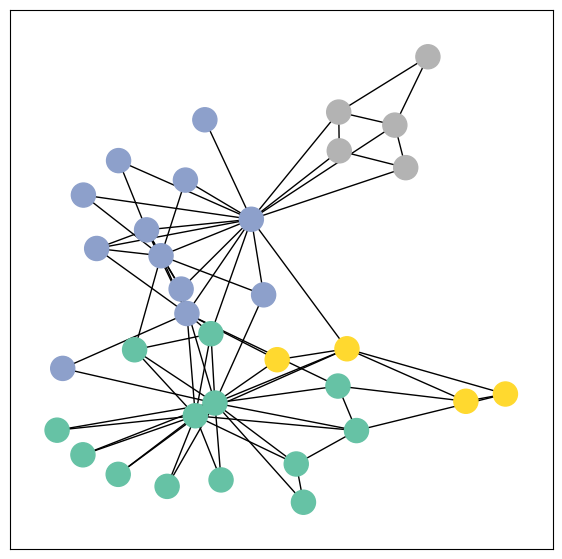

In [23]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

In [24]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()

        out = self.classifier(h)

        return out, h

In [25]:
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Embedding shape: [34, 2]


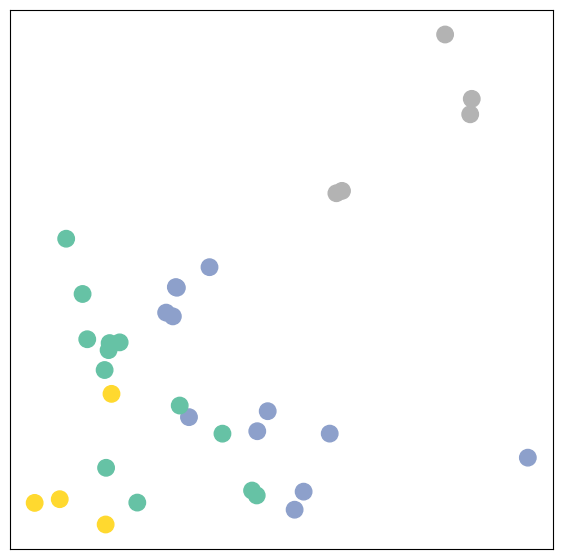

In [26]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

In [27]:
import time

model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

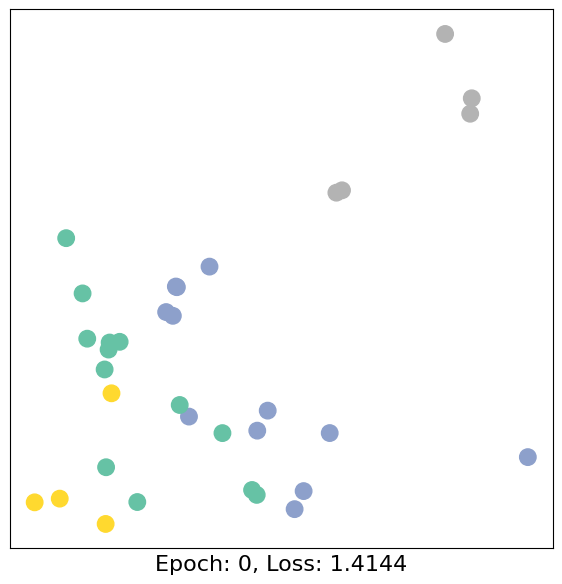

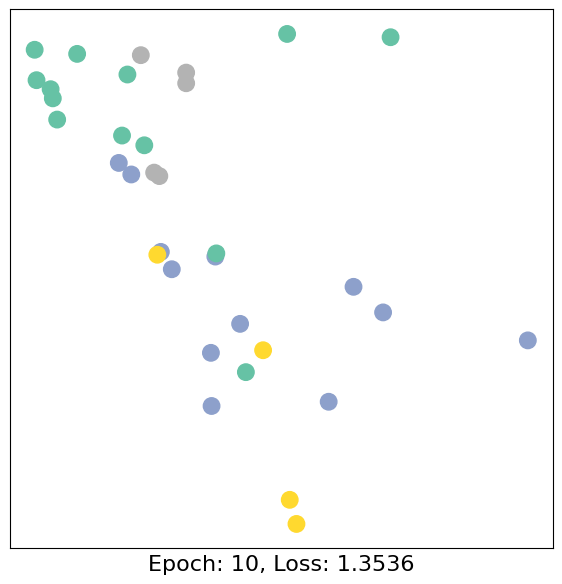

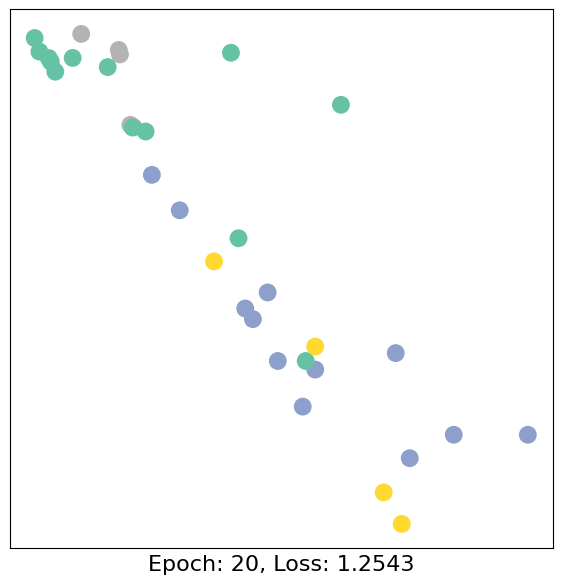

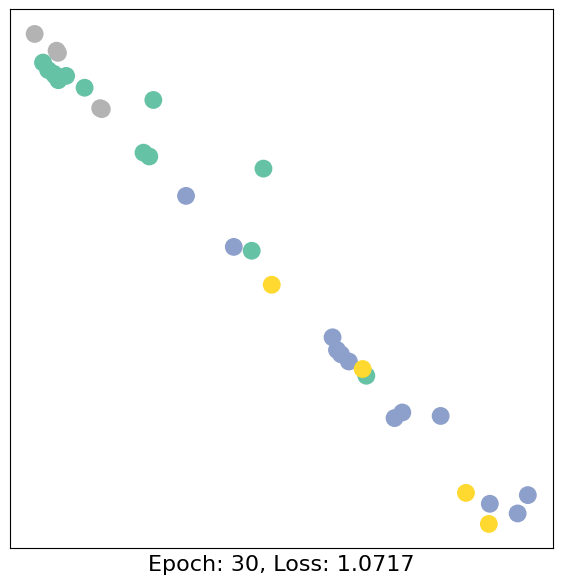

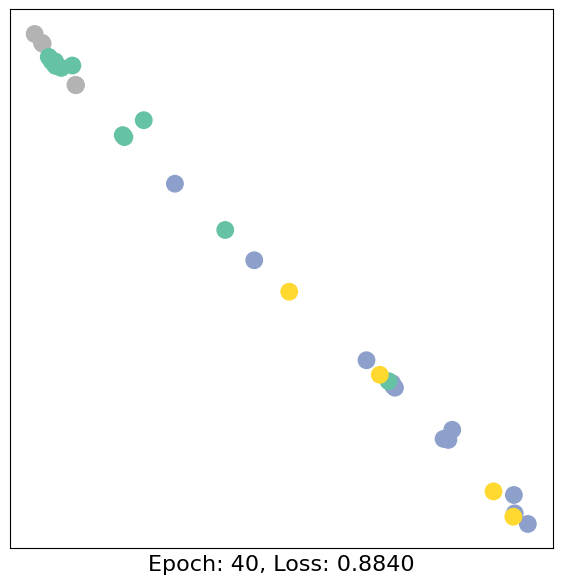

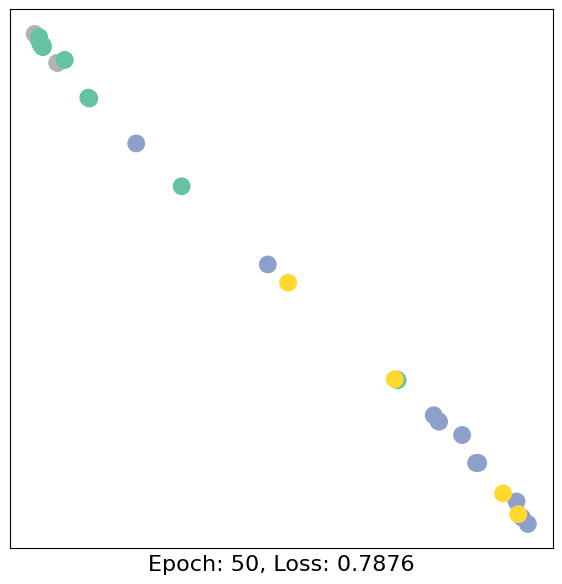

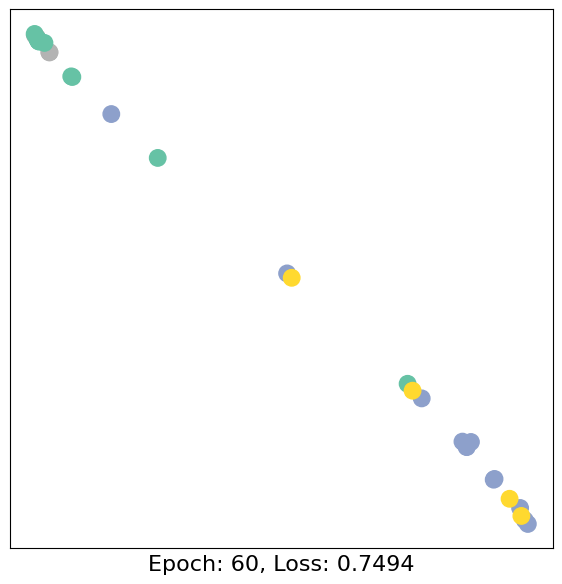

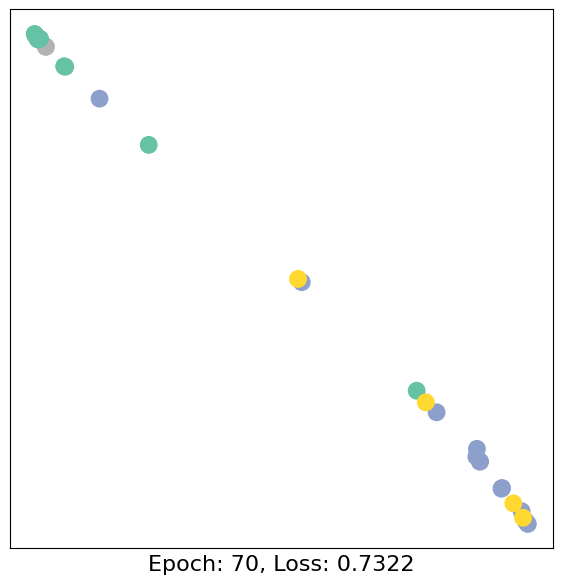

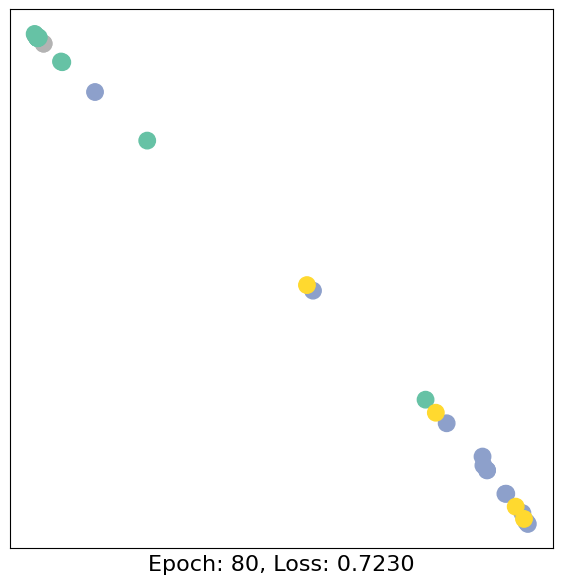

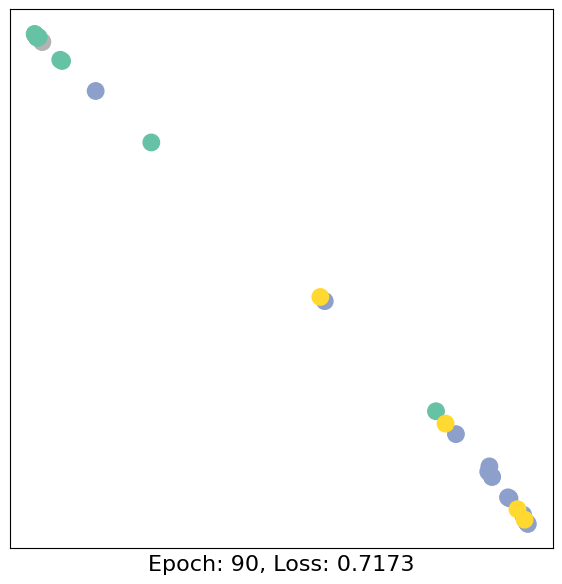

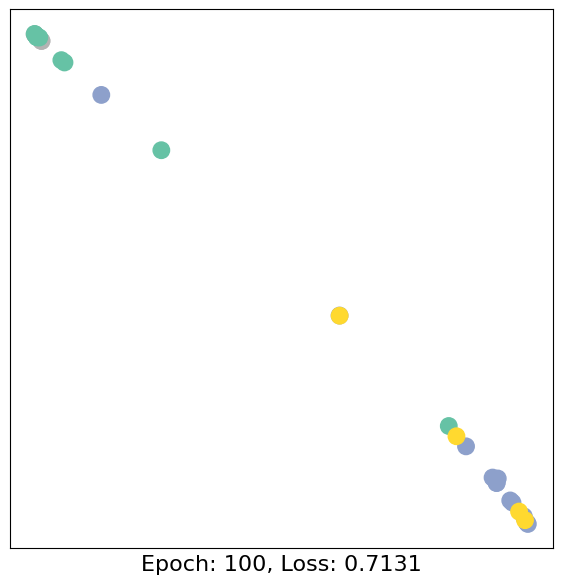

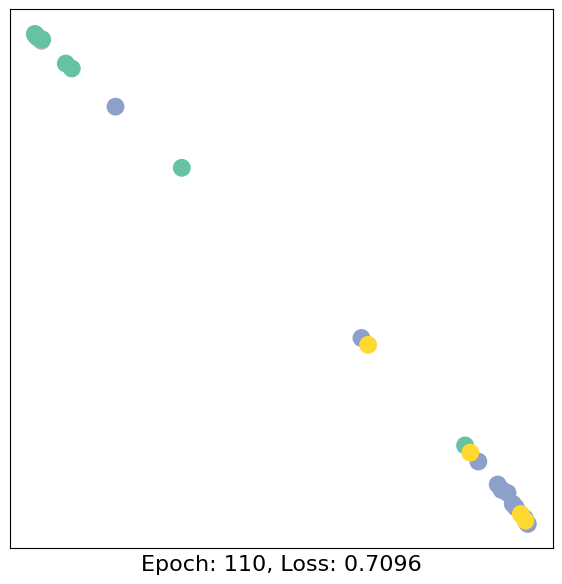

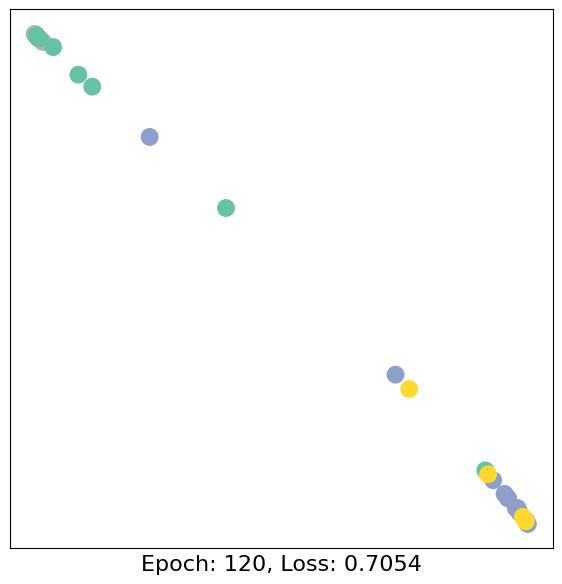

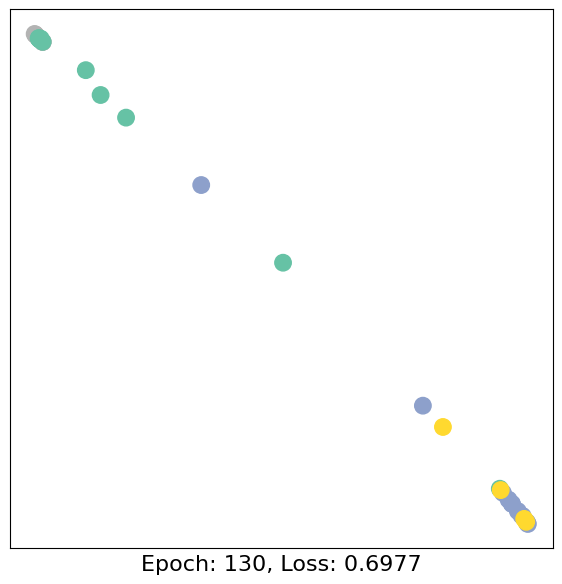

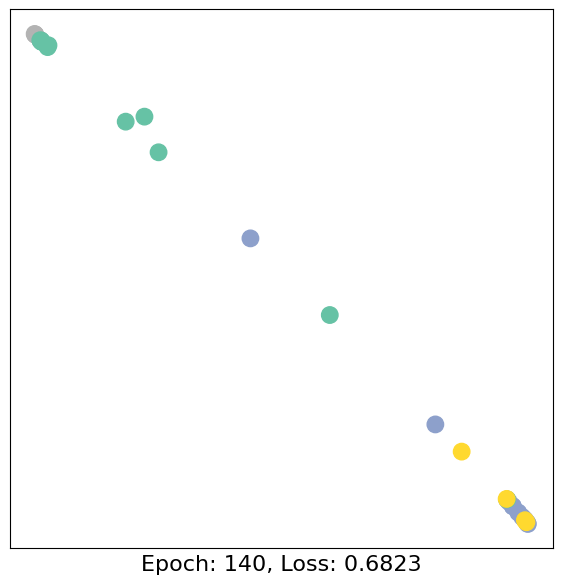

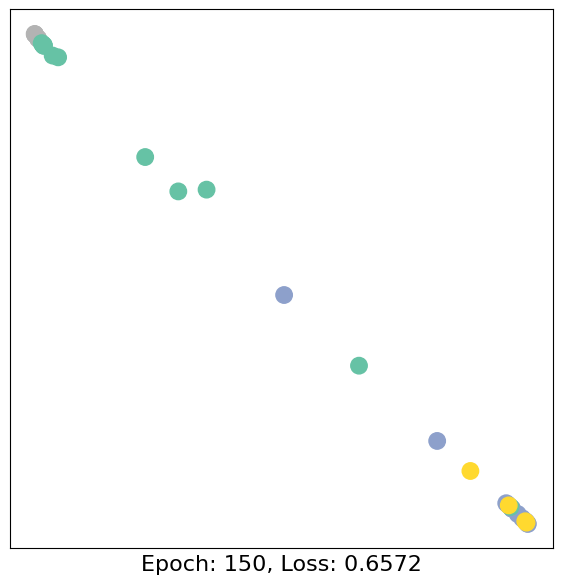

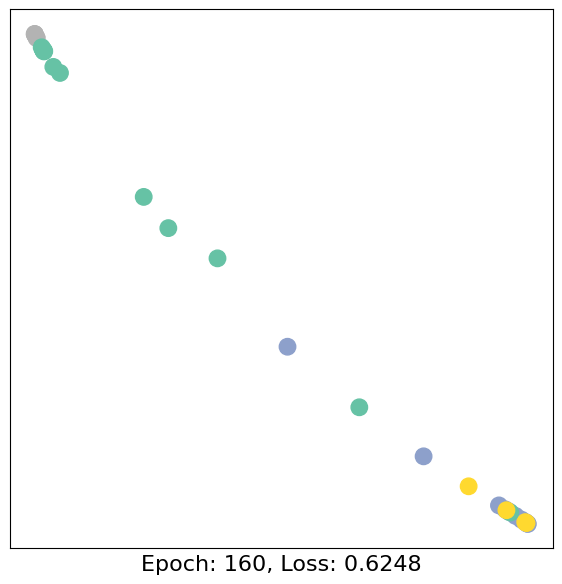

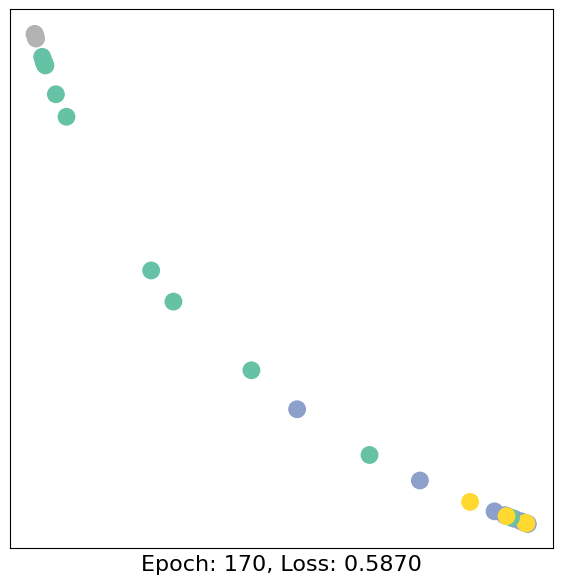

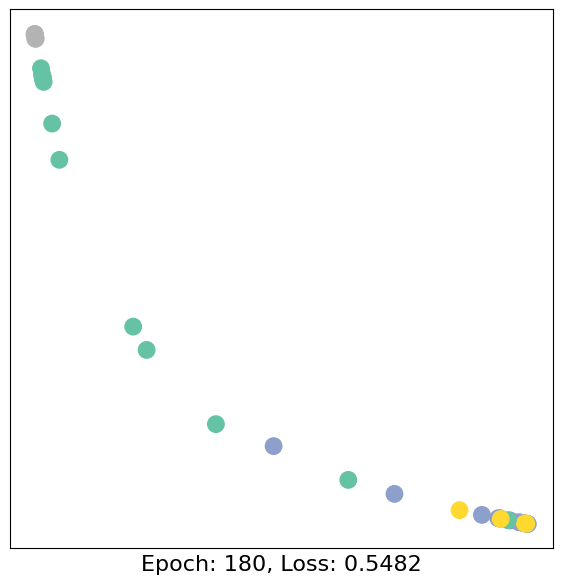

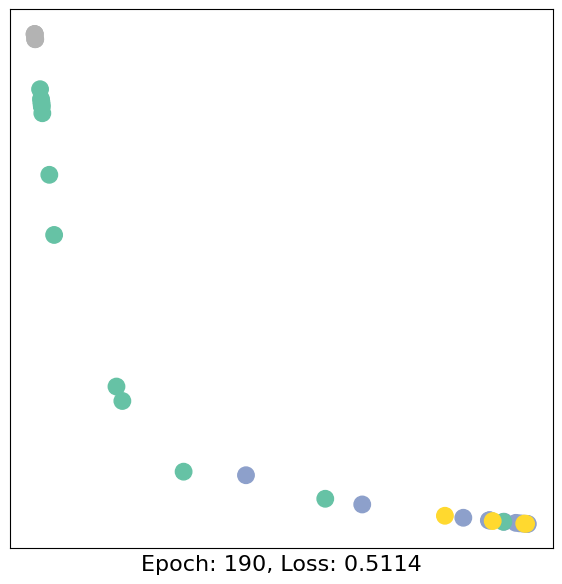

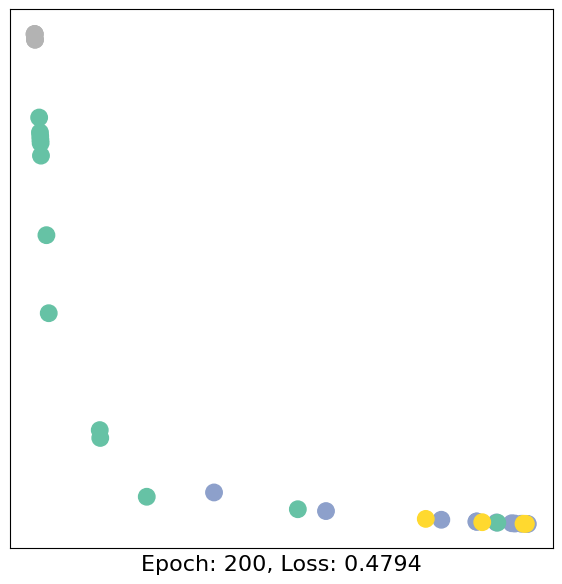

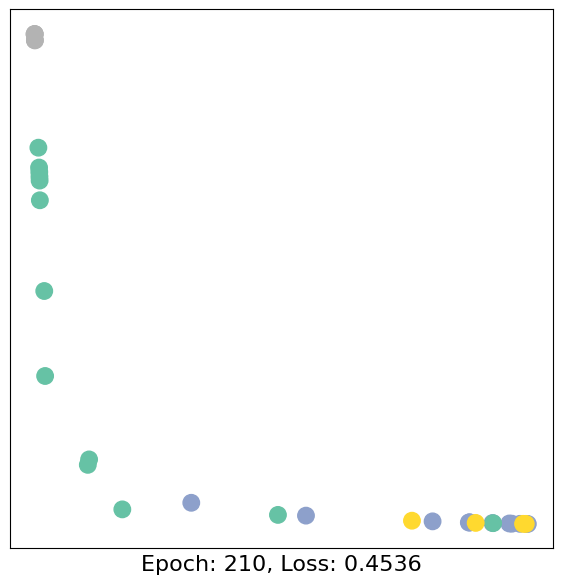

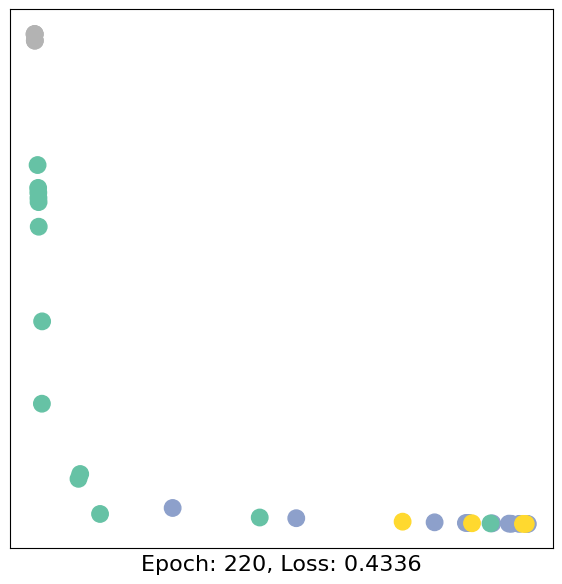

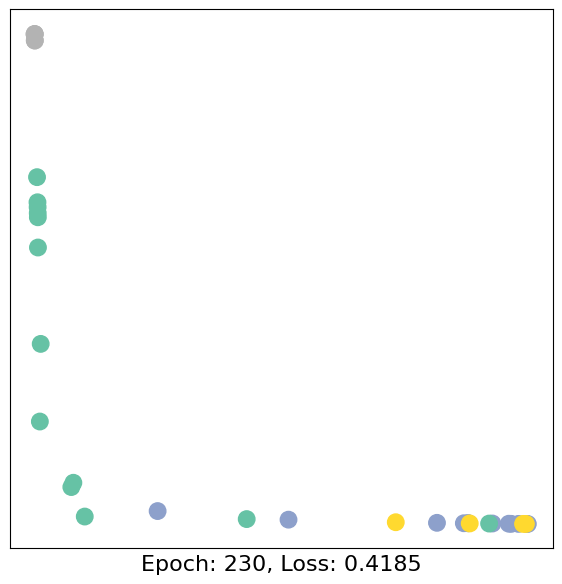

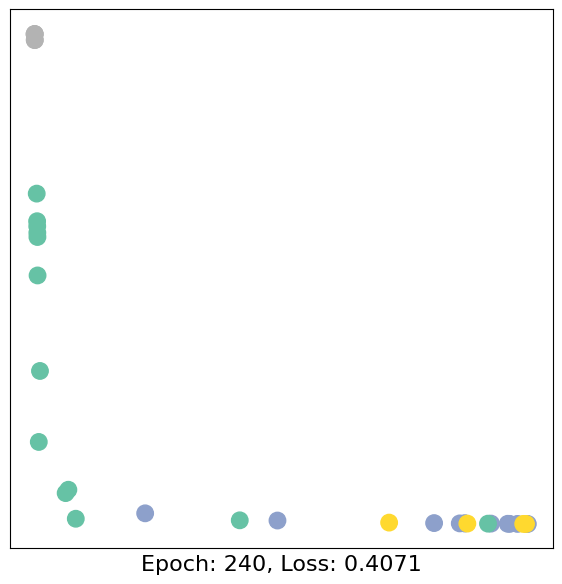

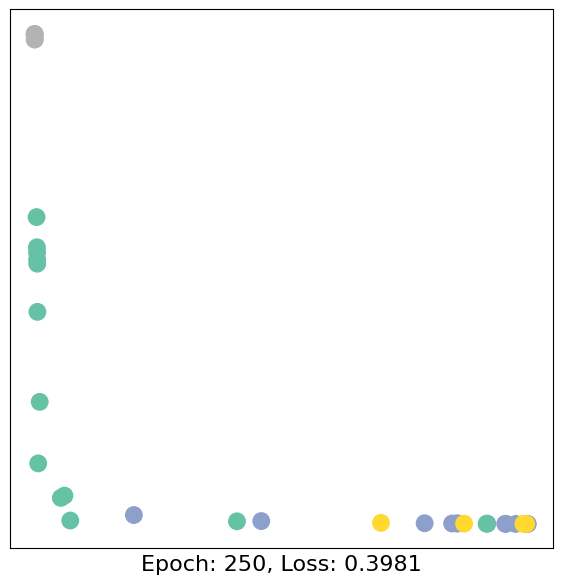

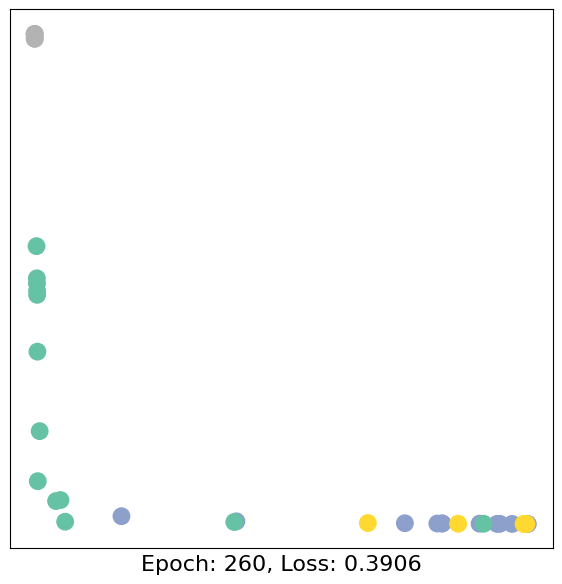

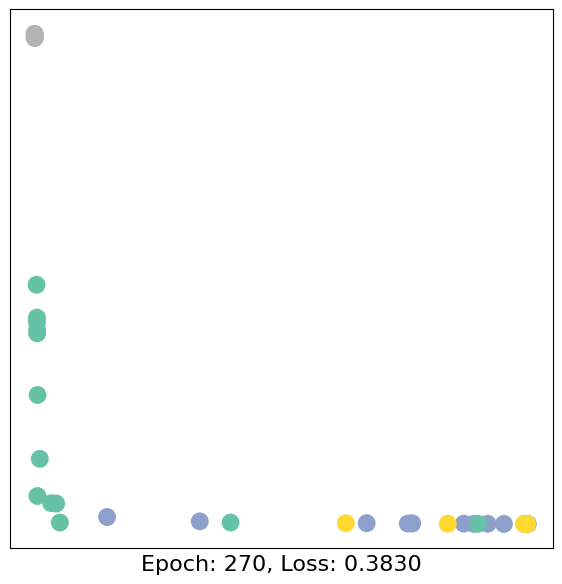

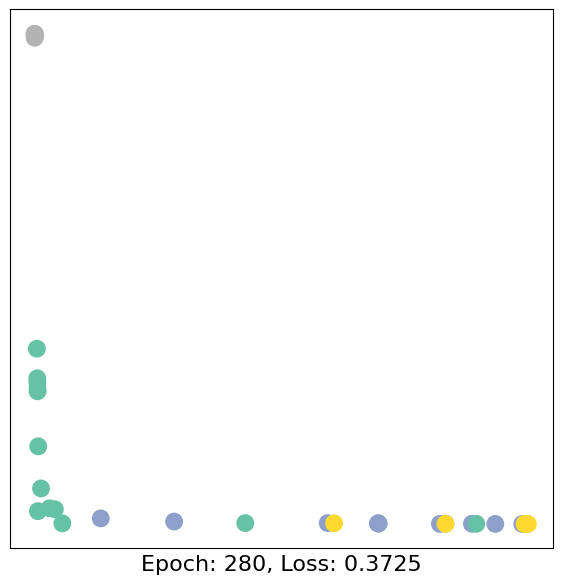

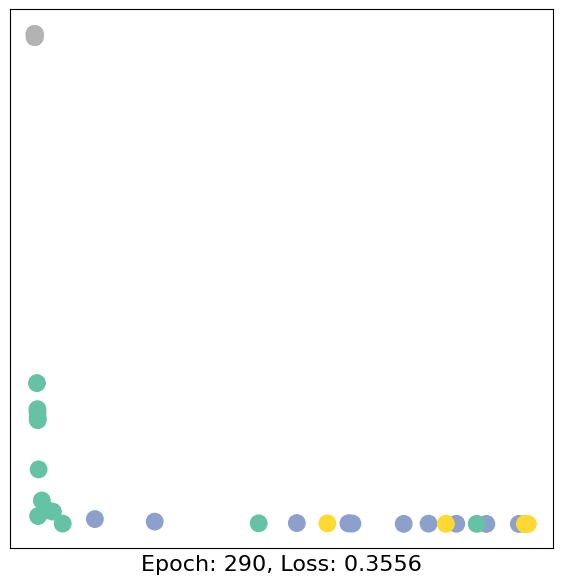

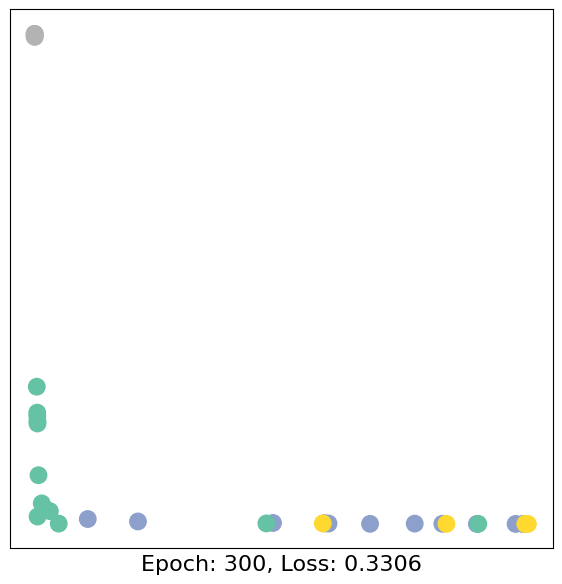

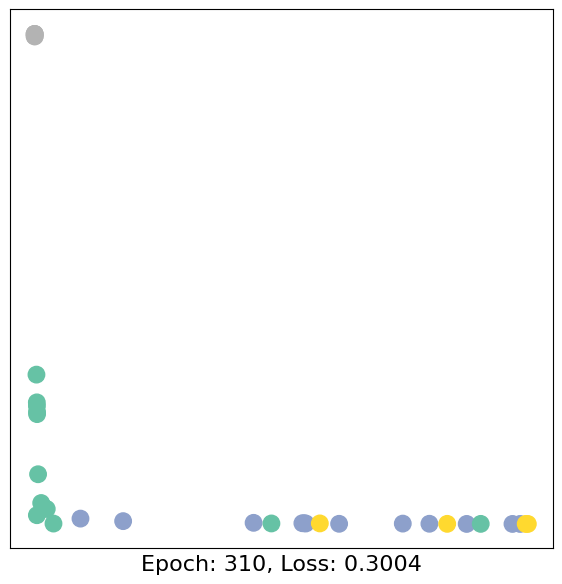

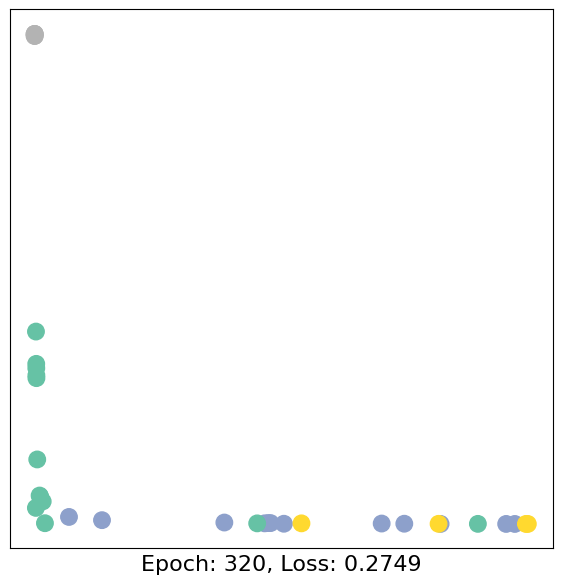

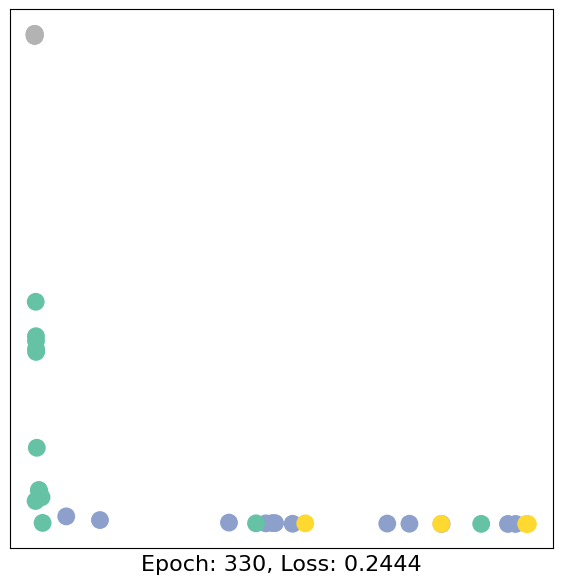

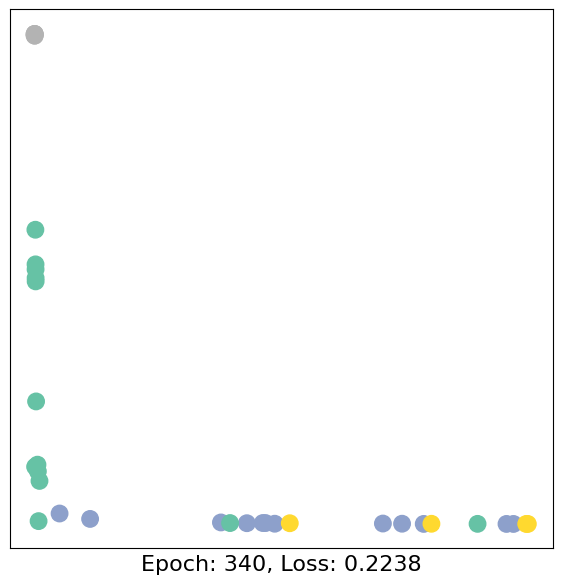

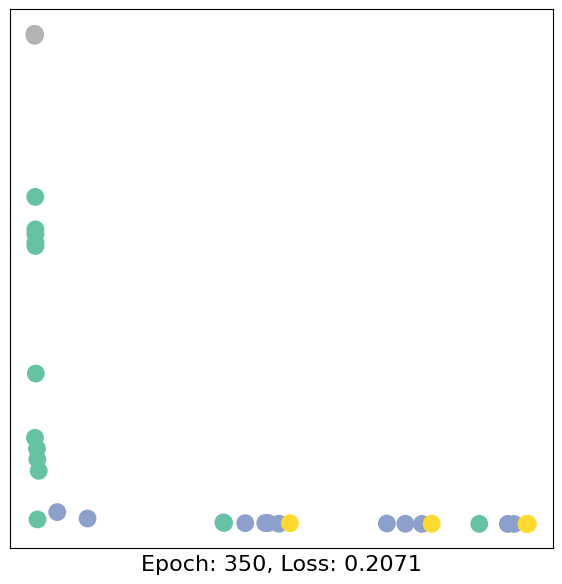

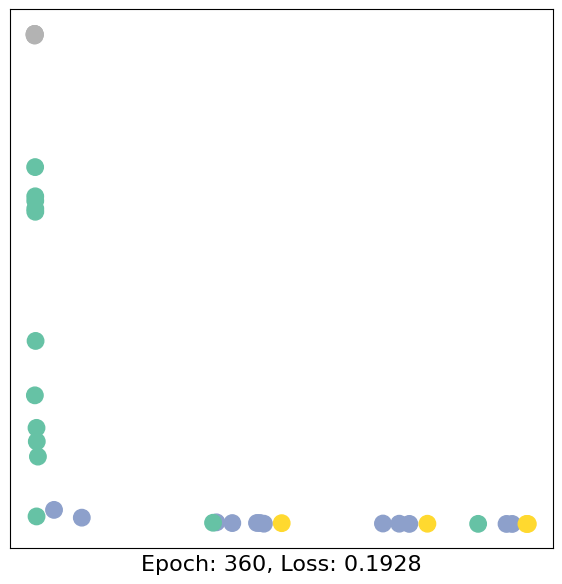

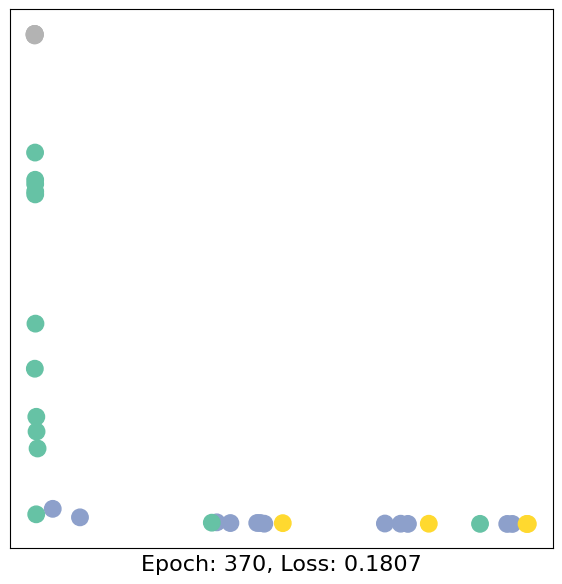

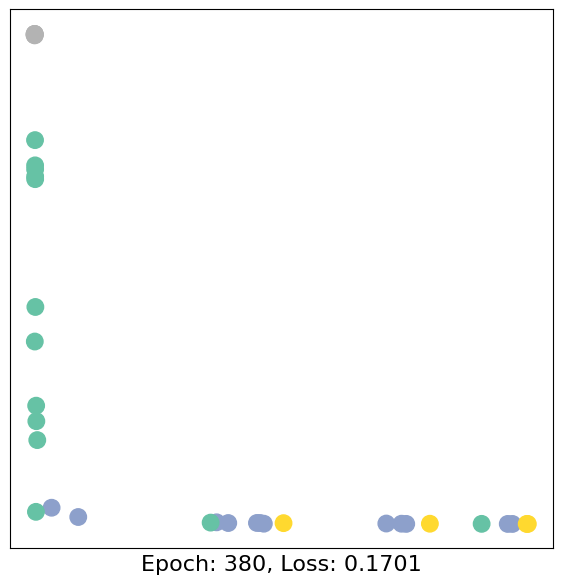

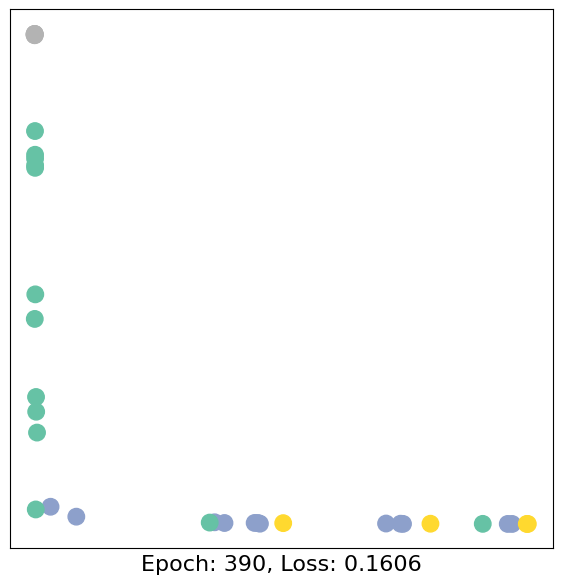

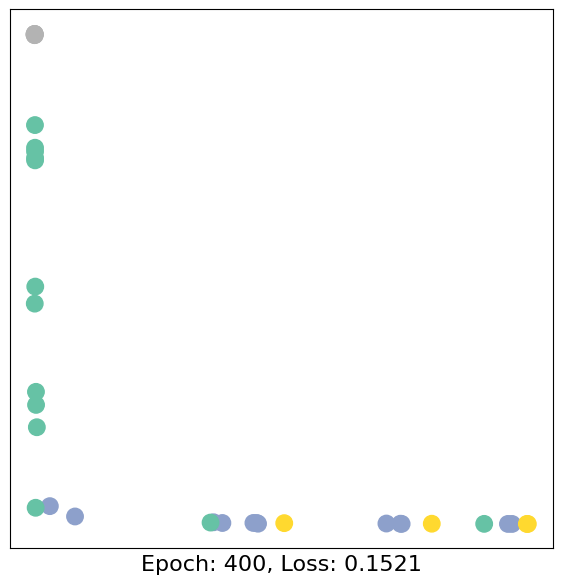

In [28]:
for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)